# 1. Confusion Matrix를 위한 Model 만들기

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://github.com/euphoris/datasets/raw/master/imdb.zip')
print(df.shape)

(1000, 2)


In [3]:
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer()
tdm = cv.fit_transform(df['review'])
print(tdm.shape)

(1000, 3047)


In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
    train_test_split(
        tdm,
        df['sentiment'].values,
        test_size=0.2,
        random_state=1234
    )

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(800, 3047) (800,)
(200, 3047) (200,)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(train_input.shape[-1], )))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3048      
Total params: 3,048
Trainable params: 3,048
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['acc']
)

history = model.fit(
    train_input.A,
    train_target,
    epochs=200,
    validation_data=(test_input.A, test_target),
    verbose=0
)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

train_acc = history.history['acc']
val_acc = history.history['val_acc']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_list = range(len(train_acc))

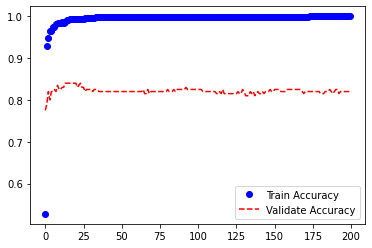

''

In [24]:
plt.plot(epoch_list, train_acc, 'bo', label='Train Accuracy')
plt.plot(epoch_list, val_acc, 'r--', label='Validate Accuracy')

plt.legend()
plt.show()
;

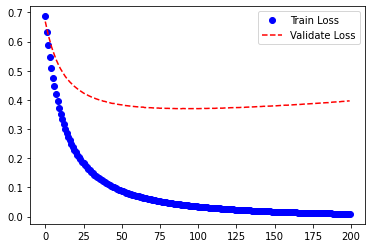

''

In [25]:
plt.plot(epoch_list, train_loss, 'bo', label='Train Loss')
plt.plot(epoch_list, val_loss, 'r--', label='Validate Loss')

plt.legend()
plt.show()
;

# 2. Confusion Matrix Practice

In [26]:
test_pred = model.predict(test_input.A)

* Threshold = 0.7

In [27]:
test_pred_binary = np.where(test_pred > 0.7, 1, 0)

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_pred_binary, test_target)

array([[93, 30],
       [ 6, 71]])

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [30]:
accuracy_score(test_target, test_pred_binary)

0.82

In [31]:
precision_score(test_target, test_pred_binary, pos_label=1)

0.922077922077922

In [32]:
recall_score(test_target, test_pred_binary, pos_label=1)

0.7029702970297029

In [33]:
f1_score(test_target, test_pred_binary, pos_label=1)

0.797752808988764

* Threshold = 0.3

In [34]:
test_pred_binary = np.where(test_pred > 0.3, 1, 0)

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_pred_binary, test_target)

array([[75, 13],
       [24, 88]])

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [37]:
accuracy_score(test_target, test_pred_binary)

0.815

In [38]:
precision_score(test_target, test_pred_binary, pos_label=1)

0.7857142857142857

In [39]:
recall_score(test_target, test_pred_binary, pos_label=1)

0.8712871287128713

In [40]:
f1_score(test_target, test_pred_binary, pos_label=1)

0.8262910798122066

### Threshold가 높아지고 낮아짐에 따라 각 Score가 어떻게 변하는지 Keep in mind, Josh!

# 3. ROC Curve Practice

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

FP_list, TP_list, Threshold_list = roc_curve(test_target, test_pred)

* **FalsePositiveRatio** = FP / (TN + FP) = 1 - **Specificity**
* **TruePositiveRatio** = TP / (FN + TP) = **Recall** = **Sensitivity**

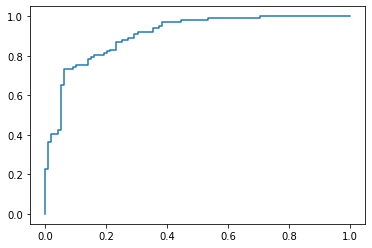

''

In [42]:
plt.plot(FP_list, TP_list)
plt.show()
;

In [43]:
roc_auc_score(test_target, test_pred)

0.9072907290729073

# 4. Regularization with L1 & L2 Practice

In [44]:
from tensorflow.keras.regularizers import l1_l2, l1, l2

model_elastic = Sequential()
model_elastic.add(Dense(1, activation='sigmoid', kernel_regularizer=l1_l2(0.01, 0.02)))

model_l1 = Sequential()
model_l1.add(Dense(1, activation='sigmoid', kernel_regularizer=l1(0.001)))

model_l2 = Sequential()
model_l2.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))

In [45]:
model_elastic.compile(
    optimizer=Adam(lr=0.01),
    loss='binary_crossentropy',
    metrics=['acc']
)

model_l1.compile(
    optimizer=Adam(lr=0.01),
    loss='binary_crossentropy',
    metrics=['acc']
)

model_l2.compile(
    optimizer=Adam(lr=0.01),
    loss='binary_crossentropy',
    metrics=['acc']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [46]:
model_elastic.fit(
    train_input.A,
    train_target,
    epochs=100,
    validation_data=(test_input.A, test_target),
    verbose=0
)

model_l1.fit(
    train_input.A,
    train_target,
    epochs=100,
    validation_data=(test_input.A, test_target),
    verbose=0
)

model_l2.fit(
    train_input.A,
    train_target,
    epochs=100,
    validation_data=(test_input.A, test_target),
    verbose=0
)

In [47]:
TermWeightElastic_df = pd.DataFrame({
    'term': cv.get_feature_names(),
    'weight': model_elastic.trainable_weights[0].numpy().flat
})
TermWeightElastic_df = TermWeightElastic_df.sort_values('weight', ascending=False).reset_index(drop=True)

TermWeightL1_df = pd.DataFrame({
    'term': cv.get_feature_names(),
    'weight': model_l1.trainable_weights[0].numpy().flat
})
TermWeightL1_df = TermWeightL1_df.sort_values('weight', ascending=False).reset_index(drop=True)

TermWeightL2_df = pd.DataFrame({
    'term': cv.get_feature_names(),
    'weight': model_l2.trainable_weights[0].numpy().flat
})
TermWeightL2_df = TermWeightL2_df.sort_values('weight', ascending=False).reset_index(drop=True)

* Elastic Net

In [48]:
TermWeightElastic_df.head()

,term,weight
0,best,0.008708
1,great,0.007709
2,garbage,0.006594
3,if,0.006590
4,than,0.005426


In [49]:
TermWeightElastic_df.tail()

,term,weight
3042,take,-0.005640
3043,bad,-0.005991
3044,cheap,-0.006754
3045,no,-0.006961
3046,movie,-0.008110


* L1

In [50]:
TermWeightL1_df.head()

,term,weight
0,great,4.322004
1,wonderful,4.189086
2,love,3.402917
3,film,3.214185
4,beautiful,2.683459


In [51]:
TermWeightL1_df.tail()

,term,weight
3042,plot,-2.494336
3043,didn,-2.555024
3044,stupid,-2.743877
3045,no,-2.976540
3046,bad,-5.994210


* L2

In [52]:
TermWeightL2_df.head()

,term,weight
0,great,1.496781
1,film,1.243590
2,love,0.992511
3,and,0.977221
4,wonderful,0.955049


In [53]:
TermWeightL2_df.tail()

,term,weight
3042,plot,-0.884020
3043,no,-0.916477
3044,awful,-0.957632
3045,not,-1.068544
3046,bad,-2.032928


* L2 Regularization은 Weight을 모두 전반적으로 훨씬 낮게 만들어주는군! (compared to L1)